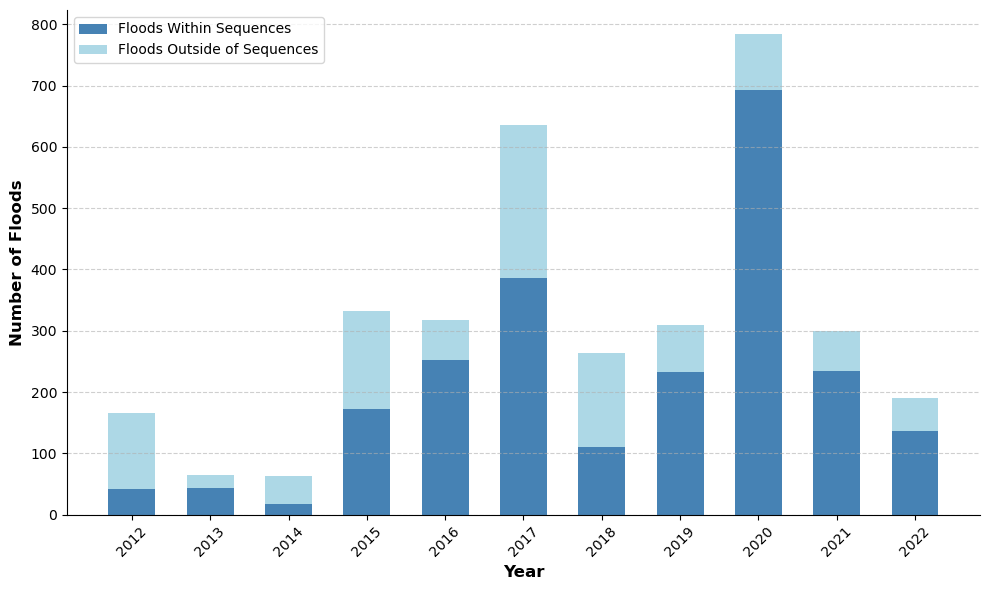

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 读取文件
file_path = 'Filtered_SequenceEvent_1year.csv'
data = pd.read_csv(file_path)

# 添加 'Year' 列，从 'Incident Begin Date' 提取年份
data['Year'] = pd.to_datetime(data['Incident Begin Date'], errors='coerce').dt.year

# 定义序列洪水（Sequence = 1）
data['Is Sequence Flood'] = data['Sequence'] == 1

# 按年份计算总洪水数和序列洪水数
flood_summary = data.groupby('Year').agg(
    Total_Floods=('Is Sequence Flood', 'size'),  # 总洪水数
    Sequence_Floods=('Is Sequence Flood', 'sum')  # 序列洪水数（True值统计为1）
).reset_index()

# 去除 2011 年数据
filtered_summary = flood_summary[flood_summary['Year'] != 2011]

# 提取绘图数据
years = filtered_summary['Year']
total_floods = filtered_summary['Total_Floods']
sequence_floods = filtered_summary['Sequence_Floods']
non_sequence_floods = total_floods - sequence_floods

# x轴的位置
x = np.arange(len(years))
width = 0.6  # 柱宽度

# 创建柱状图
plt.figure(figsize=(10, 6))
plt.bar(x, sequence_floods, width, label='Floods Within Sequences ', color='steelblue')
plt.bar(x, non_sequence_floods, width, bottom=sequence_floods, label='Floods Outside of Sequences', color='lightblue')

# 添加虚线网格线
plt.grid(axis='y', linestyle='--', alpha=0.6)

# 图表信息
plt.xlabel('Year', fontweight="bold", fontsize=12)
plt.ylabel('Number of Floods', fontweight="bold", fontsize=12)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.xticks(x, years, rotation=45)  # x轴标签倾斜
plt.legend(fontsize=10)
plt.tight_layout()  # 调整图表布局
# Set global font style to Times New Roman
plt.rcParams['font.family'] = 'Times New Roman'
plt.show()


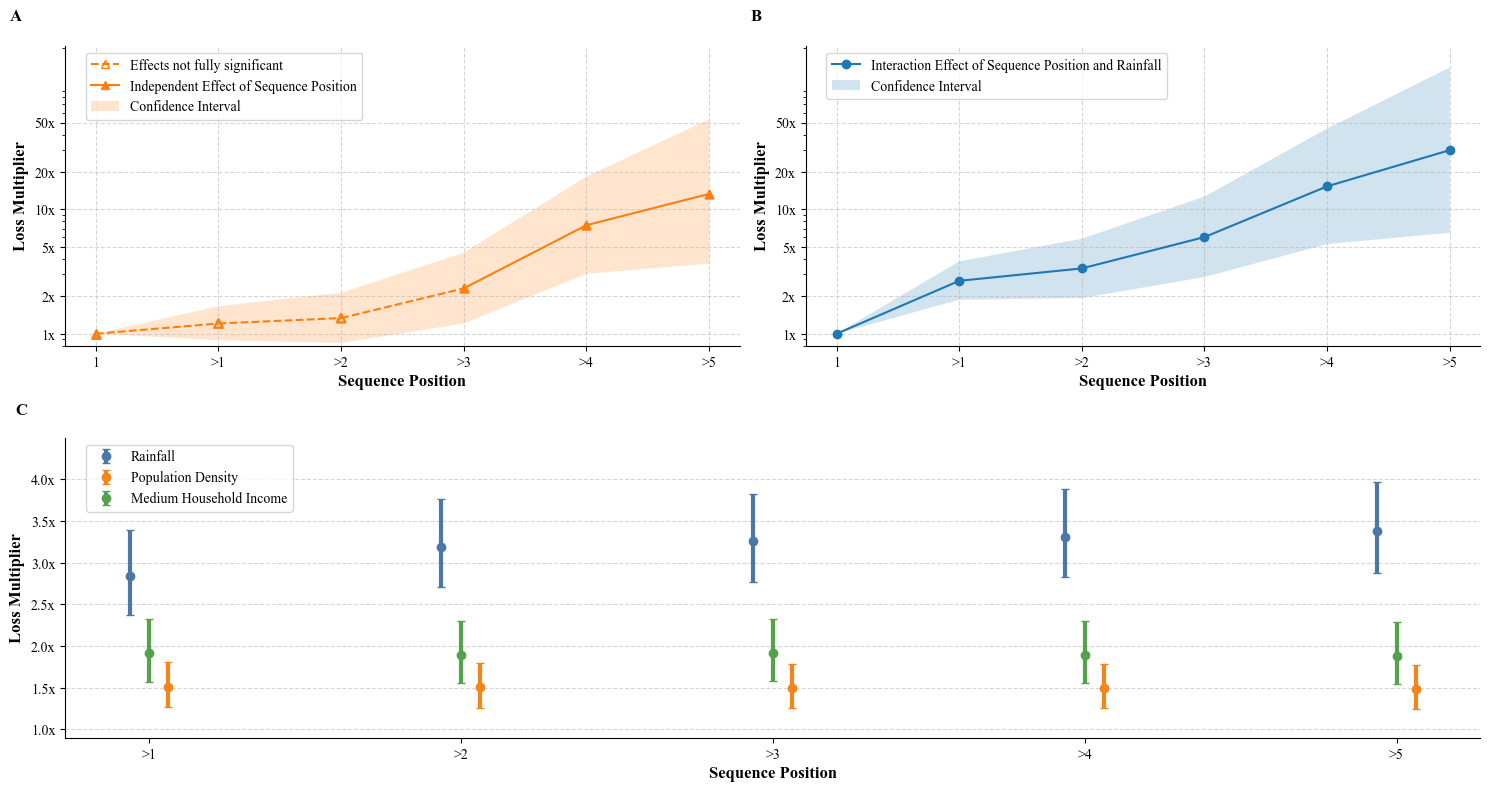

In [3]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np

# 创建画布和 GridSpec 布局
fig = plt.figure(figsize=(15, 8))  # 设置画布大小
gs = GridSpec(2, 2, height_ratios=[1, 1], figure=fig)  # 上半部分和下半部分的高度比例为 1:2

# 定义 x 值
x = ["1", ">1", ">2", ">3", ">4", ">5"]

# 定义数据
y_exp = np.exp([0, 0.98, 1.21, 1.79, 2.73, 3.40])  # 蓝线
y2_exp = np.exp([0, 0.19, 0.29, 0.84, 2.01, 2.59])  # 橙线

blue_lower = np.exp([0, 0.63, 0.66, 1.05, 1.66, 1.87])  # 蓝线置信区间下界
blue_upper = np.exp([0, 1.34, 1.76, 2.54, 3.80, 4.93])  # 蓝线置信区间上界

red_lower = np.exp([0, -0.12, -0.17, 0.19, 1.11, 1.30])  # 橙线置信区间下界
red_upper = np.exp([0, 0.51, 0.76, 1.50, 2.91, 3.97])  # 橙线置信区间上界

# 定义颜色
fresh_blue = "#1f77b4"
fresh_orange = "#ff7f0e"

# 计算纵轴的最大值
y_max = max(max(blue_upper), max(red_upper)) * 1.5  # 留多余顶部空间

# 初始化标志变量
add_label_effects = True  # 用于虚线部分的图例
add_label_independent = True  # 用于实线部分的图例

# 子图 1：上半部分左侧
ax1 = fig.add_subplot(gs[0, 0])

# 绘制折线
for i in range(len(x) - 1):
    if i in [0, 1, 2]:  # 虚线部分
        ax1.plot(
            x[i : i + 2], y2_exp[i : i + 2], linestyle="--", color=fresh_orange,
            marker="^", fillstyle="none",
            label="Effects not fully significant" if add_label_effects else None
        )
        add_label_effects = False  # 绘制一次后关闭虚线部分的图例
    else:  # 实线部分
        ax1.plot(
            x[i : i + 2], y2_exp[i : i + 2], linestyle="-", color=fresh_orange,
            marker="^",
            label="Independent Effect of Sequence Position" if add_label_independent else None
        )
        add_label_independent = False  # 绘制一次后关闭实线部分的图例

# 绘制空心三角
ax1.scatter(
    x[1], y2_exp[1], marker="^", facecolors="none", edgecolors=fresh_orange, s=40, linewidth=1.5
)
ax1.scatter(
    x[2], y2_exp[2], marker="^", facecolors="none", edgecolors=fresh_orange, s=40, linewidth=1.5
)

# 绘制实心三角
ax1.scatter(
    x[0], y2_exp[0], marker="^", color=fresh_orange, s=40, linewidth=1.5
)
for i in range(3, len(x)):
    ax1.scatter(x[i], y2_exp[i], marker="^", color=fresh_orange, s=40)

ax1.fill_between(
    x,
    red_lower,
    red_upper,
    color=fresh_orange,
    alpha=0.2,
    label="Confidence Interval",
    edgecolor="none",
)
# 添加 A 标识
ax1.text(-0.7, y_max * 1.95, "A", fontsize=12, weight="bold", va="top")

# 设置坐标轴标签
ax1.set_xlabel("Sequence Position", fontsize=12, fontweight="bold")
ax1.set_ylabel("Loss Multiplier", fontsize=12, fontweight="bold")

# 设置 Y 轴为对数轴
ax1.set_yscale("log")
ax1.set_ylim(0.8, y_max)

# 设置 Y 轴刻度和标签
ax1.set_yticks([1, 2, 5, 10, 20, 50])
ax1.set_yticklabels(["1x", "2x", "5x", "10x", "20x", "50x"])

# 添加图例
ax1.legend(fontsize=10, loc="upper left", bbox_to_anchor=(0.02, 1.0))

# 添加网格
ax1.grid(axis="y", which="major", linestyle="--", alpha=0.5)
ax1.grid(axis="x", which="major", linestyle="--", alpha=0.5)

# 隐藏顶部和右侧边框
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)



# 子图 2：上半部分右侧
ax2 = fig.add_subplot(gs[0, 1])
ax2.plot(
    x,
    y_exp,
    marker="o",
    linestyle="-",
    color=fresh_blue,
    label="Interaction Effect of Sequence Position and Rainfall",
)
ax2.fill_between(
    x,
    blue_lower,
    blue_upper,
    color=fresh_blue,
    alpha=0.2,
    label="Confidence Interval",
    edgecolor="none",
)
# 添加 B 标识
ax2.text(-0.7, y_max * 1.95, "B", fontsize=12, weight="bold", va="top")

# 设置坐标轴标签
ax2.set_xlabel("Sequence Position", fontsize=12, fontweight="bold")
ax2.set_ylabel("Loss Multiplier", fontsize=12, fontweight="bold")

# 设置 Y 轴为对数轴
ax2.set_yscale("log")
ax2.set_ylim(0.8, y_max)

# 设置 Y 轴刻度和标签
ax2.set_yticks([1, 2, 5, 10, 20, 50])
ax2.set_yticklabels(["1x", "2x", "5x", "10x", "20x", "50x"])

# 添加图例
ax2.legend(fontsize=10, loc="upper left", bbox_to_anchor=(0.02, 1.0))

# 添加网格线
ax2.grid(axis="y", which="major", linestyle="--", alpha=0.5)
ax2.grid(axis="x", which="major", linestyle="--", alpha=0.5)

# 添加散点图
ax2.scatter(x, y_exp, marker="o", color=fresh_blue, s=20)  # 调整点大小

# 隐藏顶部和右侧边框
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)





x_values = [">1", ">2", ">3", ">4", ">5"]
categories = ["Rainfall", "Population Density", "Medium Household Income"]
effect_values_updated = [
    [np.exp(1.044292), np.exp(0.4135943), np.exp(0.6489852)],  # >1
    [np.exp(1.160332), np.exp(0.408471), np.exp(0.6365456)],  # >2
    [np.exp(1.180068), np.exp(0.4007663), np.exp(0.6501076)],  # >3
    [np.exp(1.197487), np.exp(0.4012141), np.exp(0.6375951)],  # >4
    [np.exp(1.218274), np.exp(0.3955218), np.exp(0.6332882)],  # >5
]
ci_lower_updated = [
    [np.exp(0.8662245), np.exp(0.2356072), np.exp(0.4537477)],  # >1
    [np.exp(0.995251), np.exp(0.2301735), np.exp(0.4408164)],  # >2
    [np.exp(1.018227), np.exp(0.2235747), np.exp(0.4553722)],  # >3
    [np.exp(1.037374), np.exp(0.2249897), np.exp(0.4437583)],  # >4
    [np.exp(1.05826), np.exp(0.2167852), np.exp(0.4373753)],   # >5
]
ci_upper_updated = [
    [np.exp(1.222359), np.exp(0.5915813), np.exp(0.8442227)],  # >1
    [np.exp(1.325413), np.exp(0.5867684), np.exp(0.8322749)],  # >2
    [np.exp(1.341909), np.exp(0.5779578), np.exp(0.844843)],  # >3
    [np.exp(1.357601), np.exp(0.5774386), np.exp(0.8314319)],  # >4
    [np.exp(1.378288), np.exp(0.5742583), np.exp(0.8292011)],  # >5
]

# 子图 3：下半部分整行
ax3 = fig.add_subplot(gs[1, :])  # 占据下半部分的整行
# Define the width of the bars and base positions
width = 0.25  # Adjust spacing between categories
positions = np.arange(len(x_values))  # Base positions for each group

# Define colors matching the reference style
colors = ["#4C78A8", "#F58518", "#54A24B"]  # Matching the 3 categories

# Loop over categories and arrange horizontally for each sequence position
for i, category in enumerate(categories):
    values = [v[i] for v in effect_values_updated]
    lower_errors = [values[j] - ci_lower_updated[j][i] for j in range(len(values))]
    upper_errors = [ci_upper_updated[j][i] - values[j] for j in range(len(values))]

    val = 0
    if i == 0:
        val = -1
    elif i == 1:
        val = 1

    ax3.errorbar(
        positions + val * width / 4, values,
        yerr=[lower_errors, upper_errors], fmt='o', 
        color=colors[i], ecolor=colors[i], elinewidth=3, capsize=3, 
        markersize=6, label=category
    )

# Customize the plot
ax3.set_xticks(positions)
ax3.set_xticklabels(x_values, fontsize=10)
ax3.set_xlabel("Sequence Position", fontsize=12, fontweight="bold")

# 设置 Y 轴范围
ax3.set_ylim(0.9, 4.5)

# 设置 Y 轴刻度和标签
ax3.set_yticks([1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0])
ax3.set_yticklabels(["1.0x", "1.5x", "2.0x", "2.5x", "3.0x", "3.5x", "4.0x"])

# 设置坐标轴标签和标题
ax3.set_ylabel("Loss Multiplier", fontsize=12, fontweight="bold")
# 在子图3左上角添加 "C" 标识，放置在图表外部
ax3.text(-0.43, ax3.get_ylim()[1] * 1.05, "C", fontsize=12, weight="bold", va="bottom", ha="left")

# 添加图例
ax3.legend(fontsize=10, loc="upper left", bbox_to_anchor=(0.01, 1.0))

# 添加网格线
ax3.grid(axis="y", linestyle="--", alpha=0.5)

# 隐藏顶部和右侧边框
ax3.spines["top"].set_visible(False)
ax3.spines["right"].set_visible(False)

# Set global font style to Times New Roman
plt.rcParams['font.family'] = 'Times New Roman'

# 调整布局
plt.tight_layout()
plt.show()


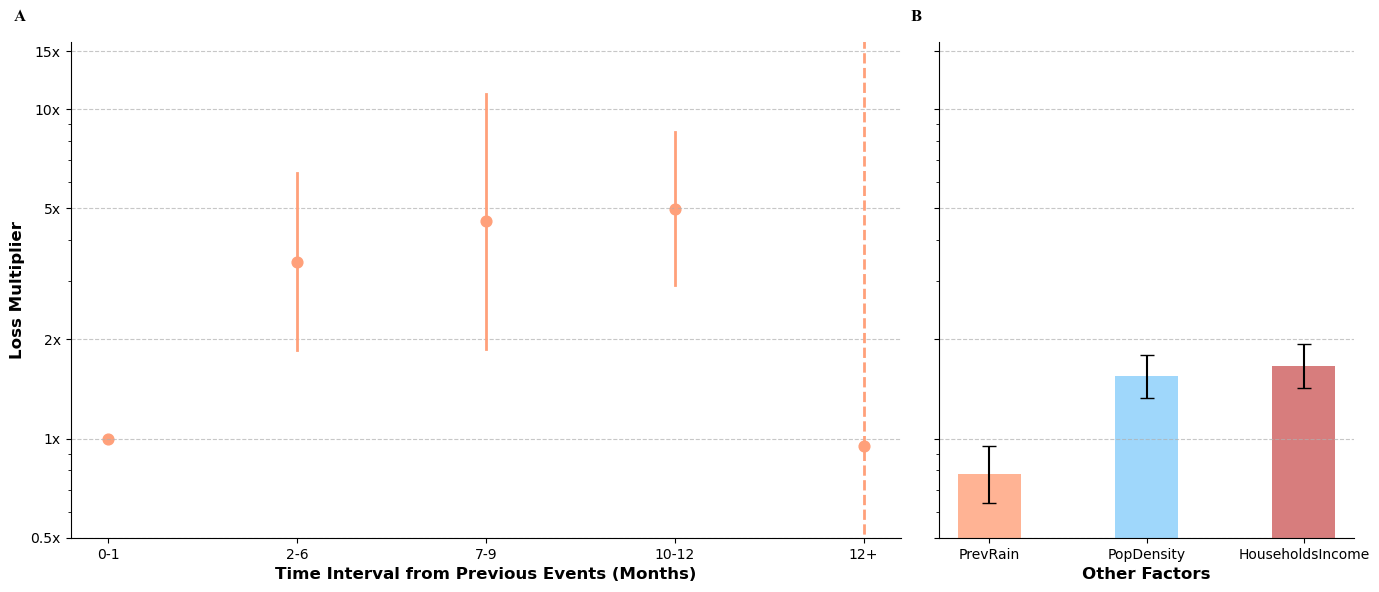

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Updated data for the left plot (Effect of Inter-Event Intervals on Loss)
x_left_updated = ["0-1", "2-6", "7-9", "10-12", "12+"]
left_bottoms_updated = [
    1, 
    np.exp(0.6185891), 
    np.exp(0.6248688), 
    np.exp(1.070603), 
    np.exp(-5.034402)  # Replace with meaningful values as per interpretation
]
left_middles_updated = [
    1, 
    np.exp(1.236254), 
    np.exp(1.517193), 
    np.exp(1.60594), 
    np.exp(-0.0505375)
]
left_tops_updated = [
    1, 
    np.exp(1.85392), 
    np.exp(2.409516), 
    np.exp(2.141276), 
    np.exp(4.933327)
]

# Updated data for the right plot (Impact of Factors on Flood Loss)
factors_updated = ["PrevRain", "PopDensity", "HouseholdsIncome"]
values_updated = [
    np.exp(-0.2507125), 
    np.exp(0.4340306), 
    np.exp(0.5093047)
]
conf_lower_updated = [
    np.exp(-0.4493675), 
    np.exp(0.283703), 
    np.exp(0.355368)
]
conf_upper_updated = [
    np.exp(-0.0520575), 
    np.exp(0.5843582), 
    np.exp(0.6632415)
]

# Colors for the plots
fresh_blue = "#87CEFA"
fresh_orange = "#FFA07A"
fresh_red = "#CD5C5C"

# Create the figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6), gridspec_kw={'width_ratios': [2, 1]}, sharey=True)

# Set global font style to Times New Roman
plt.rcParams['font.family'] = 'Times New Roman'

# Left plot: Effect of Inter-Event Intervals on Loss
for i, x in enumerate(x_left_updated):
    if i != len(x_left_updated) - 1:
        axes[0].plot([i, i], [left_bottoms_updated[i], left_tops_updated[i]], color=fresh_orange, linewidth=2)
    else:
        axes[0].plot([i, i], [left_bottoms_updated[i], left_tops_updated[i]], color=fresh_orange, linewidth=2, linestyle="--")
    axes[0].scatter(i, left_middles_updated[i], color=fresh_orange, s=60)

# Format left plot
axes[0].set_xticks(range(len(x_left_updated)))
axes[0].set_xticklabels(x_left_updated, fontsize=10)
axes[0].set_yscale("log")
axes[0].set_ylim(0.5, 16)
axes[0].set_yticks([0.5, 1, 2, 5, 10, 15])
axes[0].set_yticklabels(["0.5x","1x","2x", "5x", "10x", "15x"], fontsize=10)
axes[0].set_xlabel("Time Interval from Previous Events (Months)", fontsize=12, fontweight="bold")
axes[1].set_xlabel("Other Factors", fontsize=12, fontweight="bold")
axes[0].set_ylabel("Loss Multiplier", fontsize=12, fontweight="bold")
axes[0].grid(axis="y", linestyle="--", alpha=0.7)

# Right plot: Impact of Factors on Flood Loss with added horizontal lines
bars_updated = axes[1].bar(
    factors_updated,
    values_updated,
    color=[fresh_orange, fresh_blue, fresh_red],
    alpha=0.8,
    yerr=[
        np.array(values_updated) - np.array(conf_lower_updated),
        np.array(conf_upper_updated) - np.array(values_updated),
    ],
    capsize=5,
    error_kw=dict(ecolor="black", lw=1.5),
    width=0.4,
)

# Align right plot's Y-axis with the left plot
axes[0].set_ylim(0.5, 16)
axes[1].set_xticks(range(len(factors_updated)))
axes[1].set_xticklabels(factors_updated, fontsize=10)

axes[0].set_yticks([0.5, 1, 2, 5, 10, 15])
axes[1].grid(axis="y", which="major", linestyle="--", alpha=0.7)

axes[0].spines["top"].set_visible(False)
axes[0].spines["right"].set_visible(False)
axes[1].spines["top"].set_visible(False)
axes[1].spines["right"].set_visible(False)

# 添加 A 标识
axes[0].text(-0.5, 20, "A", fontsize=12, weight="bold", va="top")
axes[1].text(-0.5, 20, "B", fontsize=12, weight="bold", va="top")

# Final layout adjustments
plt.tight_layout()
plt.show()


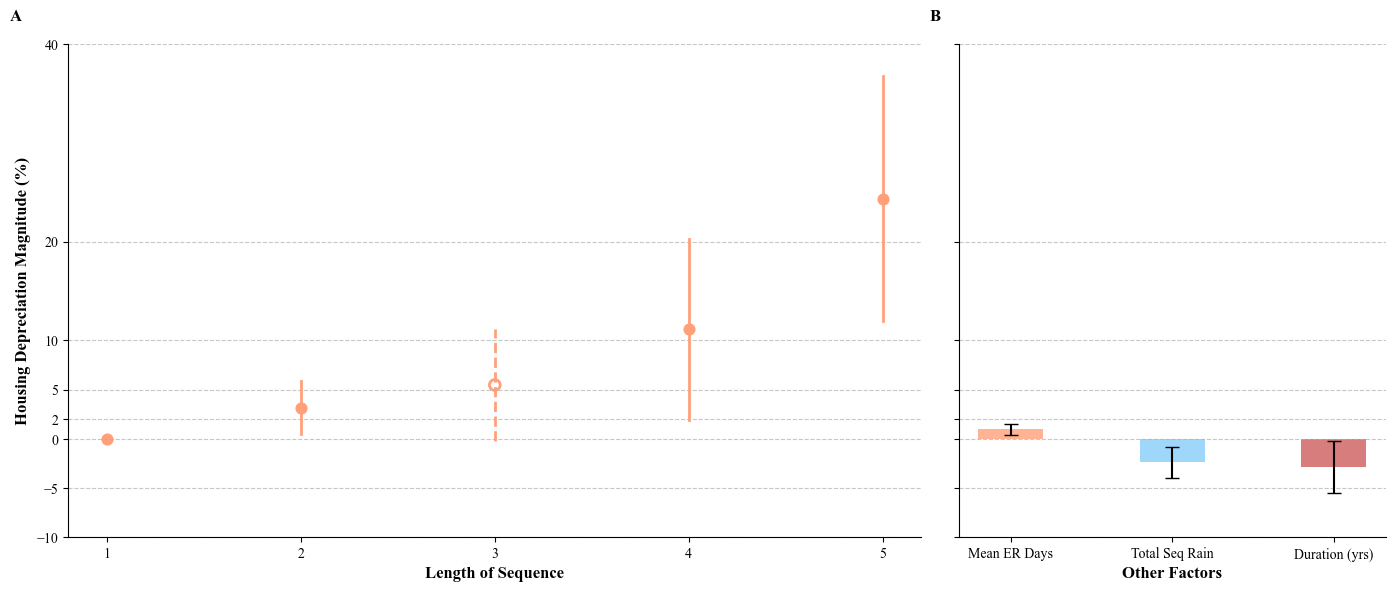

In [2]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Updated data for the left plot (Effect of Inter-Event Intervals on Loss)
x_left_updated = ["1", "2", "3", "4", "5"]
left_bottoms_updated = [
    0, 
    0.4812354, 
    -0.2399545,
    1.960017, 
    11.97812  # Replace with meaningful values as per interpretation
]
left_middles_updated = [
    0, 
    3.173734, 
    5.464505, 
    11.13539, 
    24.36036
]
left_tops_updated = [
    0, 
    5.866232, 
    11.16896, 
    20.31077, 
    36.7426
]

# Updated data for the right plot (Impact of Factors on Flood Loss)
factors_updated = ["Mean ER Days", "Total Seq Rain", "Duration (yrs)"]
values_updated = [
    0.9544311, 
    -2.373925, 
    -2.863679
]
conf_lower_updated = [
    0.4222323, 
    -3.942882, 
    -5.517432
]
conf_upper_updated = [
    1.48663, 
    -0.8049693, 
    -0.2099262
]

# Colors for the plots
fresh_blue = "#87CEFA"
fresh_orange = "#FFA07A"
fresh_red = "#CD5C5C"

# Create the figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6), gridspec_kw={'width_ratios': [2, 1]}, sharey=True)

# Set global font style to Times New Roman
plt.rcParams['font.family'] = 'Times New Roman'

# Left plot: Effect of Inter-Event Intervals on Loss
for i, x in enumerate(x_left_updated):
    if i != 2:
        axes[0].plot([i, i], [left_bottoms_updated[i], left_tops_updated[i]], color=fresh_orange, linewidth=2)
        axes[0].scatter(i, left_middles_updated[i], color=fresh_orange, s=60)
    else:
        axes[0].plot([i, i], [left_bottoms_updated[i], left_tops_updated[i]], color=fresh_orange, linewidth=2, linestyle="--")
        # Use a hollow circle for the third point
        axes[0].scatter(i, left_middles_updated[i], edgecolor=fresh_orange, facecolor='none', s=60, linewidth=2)

# Format left plot
axes[0].set_xticks(range(len(x_left_updated)))
axes[0].set_xticklabels(x_left_updated, fontsize=10)
axes[0].set_ylim(-10, 40)
axes[0].set_yticks([-10, -5, 0, 2, 5, 10, 20, 40])
axes[0].set_xlabel("Length of Sequence", fontsize=12, fontweight="bold")
axes[1].set_xlabel("Other Factors", fontsize=12, fontweight="bold")
axes[0].set_ylabel("Housing Depreciation Magnitude (%)", fontsize=12, fontweight="bold")
axes[0].grid(axis="y", linestyle="--", alpha=0.7)

# Right plot: Impact of Factors on Flood Loss
bars_updated = axes[1].bar(
    factors_updated,
    values_updated,
    color=[fresh_orange, fresh_blue, fresh_red],
    alpha=0.8,
    yerr=[
        np.array(values_updated) - np.array(conf_lower_updated),
        np.array(conf_upper_updated) - np.array(values_updated),
    ],
    capsize=5,
    error_kw=dict(ecolor="black", lw=1.5),
    width=0.4,
)

# Align right plot's Y-axis with the left plot
axes[1].set_xticks(range(len(factors_updated)))
axes[1].set_xticklabels(factors_updated, fontsize=10)
axes[0].set_ylim(-10, 40)
axes[0].set_yticks([-10, -5, 0, 2, 5, 10, 20, 40])
axes[1].grid(axis="y", which="major", linestyle="--", alpha=0.7)

axes[0].spines["top"].set_visible(False)
axes[0].spines["right"].set_visible(False)
axes[1].spines["top"].set_visible(False)
axes[1].spines["right"].set_visible(False)

# Add A and B labels
axes[0].text(-0.5, 43.5, "A", fontsize=12, weight="bold", va="top")
axes[1].text(-0.5, 43.5, "B", fontsize=12, weight="bold", va="top")

# Final layout adjustments
plt.tight_layout()
plt.show()
